# Based On RSI

RSI stands for Relative Strength Index.
It’s a simple tool that measures how fast and strong the stock price is moving.
When RSI goes above 70, it usually means the stock is getting too expensive — and it might be time to sell.
When RSI drops below 30, it means the stock might be cheap — and it could be a good time to buy.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Download Stock Data


In [2]:
# Get real-world stock prices so we can calculate the RSI and Bild our Startegy on Reliance but we can use any 
data = yf.download('Reliance.NS', start='2022-01-01', end='2025-11-01')
data.head()

C:\Users\subhy\AppData\Local\Temp\ipykernel_7972\555461298.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('Reliance.NS', start='2022-01-01', end='2025-11-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-01-03,1093.780518,1095.646128,1075.443589,1076.103370,5421611
2022-01-04,1118.465088,1119.784652,1093.848914,1099.263652,10847728
2022-01-05,1123.697632,1127.064782,1107.021470,1120.239614,11643813
2022-01-06,1099.536499,1116.599479,1096.123855,1115.325409,14447422
2022-01-07,1108.409302,1118.442271,1097.284238,1106.111499,13112115


### Step 3: Calculate RSI

In [3]:
# Function to calcluate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss 
    return 100 - (100 / (1 + rs))
data['RSI'] = calculate_rsi(data['Close'])

### Step 4: Create Buy/Sell Signals

In [4]:
data['Signal'] =  0
data.loc[data['RSI'] < 30, 'Signal'] = 1
data.loc[data['RSI'] > 70, 'Signal'] = -1
data['Position'] = data['Signal'].diff()

### Step 5: Plot RSI Strategy

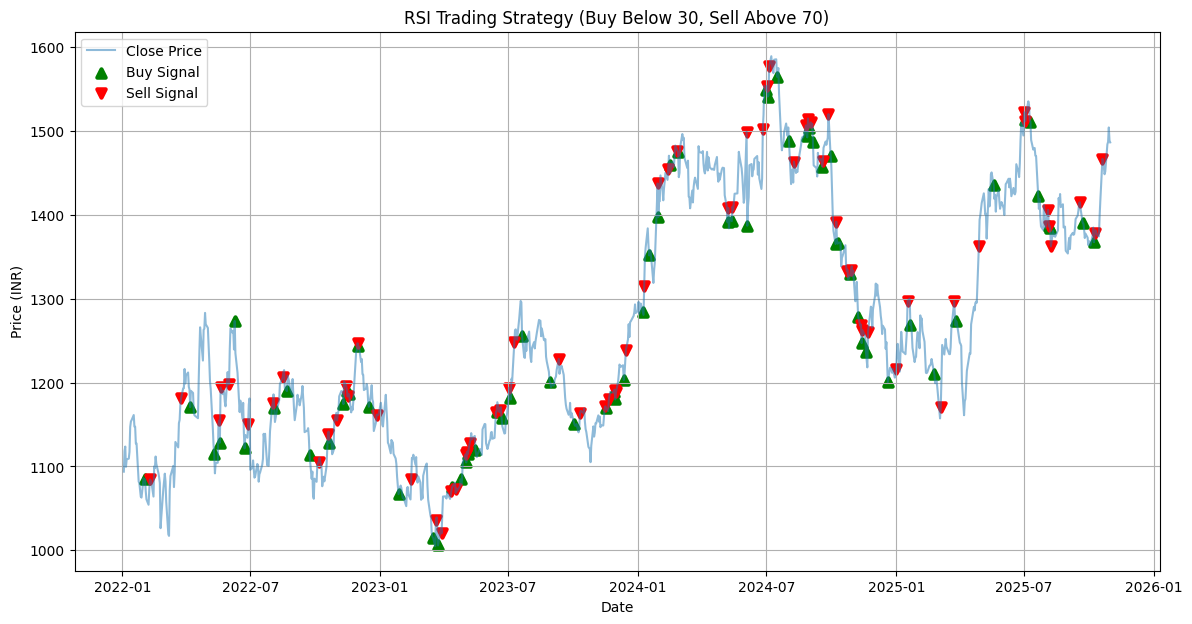

In [5]:
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index[data['Position'] == 1],
            data['Close'][data['Position'] == 1],
            label='Buy Signal', marker='^', color='green', lw=3)
plt.scatter(data.index[data['Position'] == -1],
            data['Close'][data['Position'] == -1],
            label='Sell Signal', marker='v', color='red', lw=3)
plt.title('RSI Trading Strategy (Buy Below 30, Sell Above 70)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()


## Done